In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py, os

from msfm.utils import cross_statistics, files

23-12-21 15:30:22   imports.py INF   Setting up healpy to run on 8 CPUs 


In [2]:
peaks_dir = "/cluster/work/refregier/athomsen/CosmoGrid/DESY3/v6/linear_bias/peaks"

fidu_peaks_file = os.path.join(peaks_dir, "fiducial_peaks.h5")
grid_peaks_file = os.path.join(peaks_dir, "grid_peaks.h5")

In [3]:
conf = "/cluster/home/athomsen/dlss/repos/multiprobe-simulation-forward-model/configs/v6/linear_bias.yaml"
conf = files.load_config(conf)

# number of smoothing scales
theta_fwhm = conf["analysis"]["peak_statistics"]["theta_fwhm"]
n_theta_fwhm = len(theta_fwhm[0])

### load and preprocess the summaries

In [4]:
with h5py.File(fidu_peaks_file, "r") as f:
    print(f.keys())
    fidu_peaks = f["peaks"][:]
    i_example = f["i_example"][:]
    i_noise = f["i_noise"][:]
    
print("\noriginal shapes")
print(fidu_peaks.shape)
print(i_example[:10])
print(i_noise[:10])

bin_indices, bin_names = cross_statistics.get_cross_bin_indices(with_lensing=True, with_clustering=False, with_cross_z=True, with_cross_probe=False)

# select the right auto and cross bins
print(f"Using the bin indices {bin_indices}")
print(f"With names {bin_names}")
fidu_peaks = fidu_peaks[...,bin_indices]

# concatenate the bins along the last axis
fidu_peaks = np.concatenate([fidu_peaks[...,i] for i in range(fidu_peaks.shape[-1])], axis=-1)

print("\nconcatenated shapes")
print(fidu_peaks.shape)

<KeysViewHDF5 ['i_example', 'i_noise', 'peaks']>

original shapes
(2400, 2, 15, 36)
[591. 591. 591. 341. 341. 341.   9.   9.   9. 541.]
[0. 1. 2. 0. 1. 2. 0. 1. 2. 0.]
Using the bin indices [0, 1, 2, 3, 8, 9, 10, 15, 16, 21]
With names ['bin_0x0' 'bin_0x1' 'bin_0x2' 'bin_0x3' 'bin_1x1' 'bin_1x2' 'bin_1x3'
 'bin_2x2' 'bin_2x3' 'bin_3x3']

concatenated shapes
(2400, 2, 150)


# plotting

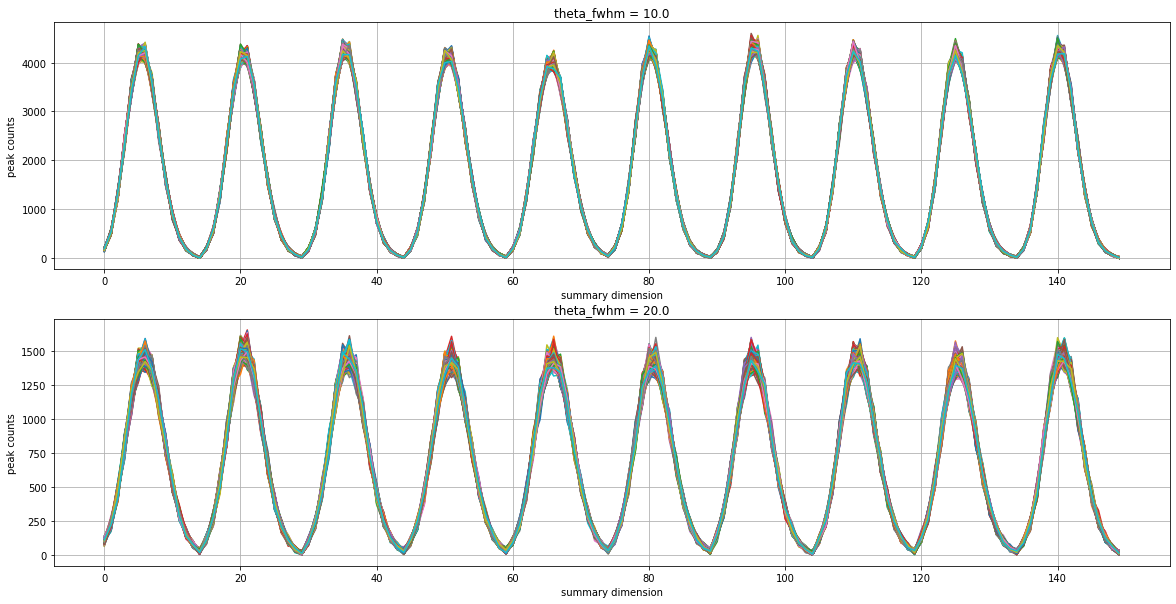

In [8]:
fig, ax = plt.subplots(figsize=(20,5*n_theta_fwhm), nrows=n_theta_fwhm)

for i in range(n_theta_fwhm):
    # transpose for the matplotlib to handle the 2D vector correctly
    ax[i].plot(fidu_peaks[:,i].T)

    ax[i].grid(True)
    ax[i].set(xlabel="summary dimension", ylabel="peak counts", title=f"theta_fwhm = {theta_fwhm[0][i]}")